In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from shapely.geometry import Point, Polygon
import shapely.geometry
import shapely.wkt
from shapely.geometry import LineString
import seaborn as sns

from matplotlib.colors import ListedColormap  
from mpl_toolkits.axes_grid1 import make_axes_locatable

import networkx as nx
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

from shapely import wkt
from pathlib import Path
from statsmodels.stats.weightstats import DescrStatsW

from matplotlib_scalebar.scalebar import ScaleBar

import matplotlib.dates as md
from datetime import datetime
import matplotlib as mpl

In [2]:
local_trips = pd.read_csv('C:/Users/kangl/Desktop/données/emploi/ENTD2018/k_deploc_public_V2.csv', sep=";",encoding='ISO-8859–1')
households = pd.read_csv('C:/Users/kangl/Desktop/données/emploi/ENTD2018/q_menage_public_V2.csv', sep=";",encoding='ISO-8859–1')
individu = pd.read_csv('C:/Users/kangl/Desktop/données/emploi/ENTD2018/k_individu_public_V2.csv', sep=";",encoding='ISO-8859–1')

tcm_hh = pd.read_csv('C:/Users/kangl/Desktop/données/emploi/ENTD2018/tcm_men_public_V2.csv', sep=";",encoding='ISO-8859–1')
tcm_ind = pd.read_csv('C:/Users/kangl/Desktop/données/emploi/ENTD2018/tcm_ind_kish_public_V2.csv', sep=";",encoding='ISO-8859–1')

longdist_trips = pd.read_csv('C:/Users/kangl/Desktop/données/emploi/ENTD2018/k_voy_depdet_public_V2.csv', sep=";",encoding='ISO-8859–1')
voyage = pd.read_csv('C:/Users/kangl/Desktop/données/emploi/ENTD2018/k_voyage_public_V2.csv', sep=";",encoding='ISO-8859–1')

C:\Users\kangl\AppData\Local\Temp\ipykernel_19696\2217786398.py:1: DtypeWarning: Columns (18,32,46,47,48,51) have mixed types. Specify dtype option on import or set low_memory=False.
  local_trips = pd.read_csv('C:/Users/kangl/Desktop/données/emploi/ENTD2018/k_deploc_public_V2.csv', sep=";",encoding='ISO-8859–1')
C:\Users\kangl\AppData\Local\Temp\ipykernel_19696\2217786398.py:5: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  tcm_hh = pd.read_csv('C:/Users/kangl/Desktop/données/emploi/ENTD2018/tcm_men_public_V2.csv', sep=";",encoding='ISO-8859–1')
C:\Users\kangl\AppData\Local\Temp\ipykernel_19696\2217786398.py:8: DtypeWarning: Columns (96,100,107,120) have mixed types. Specify dtype option on import or set low_memory=False.
  longdist_trips = pd.read_csv('C:/Users/kangl/Desktop/données/emploi/ENTD2018/k_voy_depdet_public_V2.csv', sep=";",encoding='ISO-8859–1')


In [3]:
typical_w_d = ['lundi','mardi','mercredi','jeudi','vendredi']
typical_wkd = ['samedi','dimanche']
PT = [5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 5.10,6.1,6.2,6.3,6.4,6.5]
VP = [3.1,3.2,3.3,3.4]
avion = [7.1,7.2,7.3]

# mobility long distance

In [4]:
mot = [9.1,1.1]
trips_IDF_pro_typeday_long = longdist_trips[(longdist_trips['DEP_REG_TRAV_ETUDE']==1)
                                       &(longdist_trips['OLDMOT'].isin(mot))].reset_index(drop=True)
duree_dist_long = trips_IDF_pro_typeday_long [ ['IDENT_IND','poids_annuel','OLDDEBJ_jour','OLDFINJ_jour','OLDVMH','DEP_REG_TRAV_ETUDE','dvo_orides','OLDKM_fin',
                                      'OLDDEH','OLDADURH','REG_voy_des', 'REG_dep_ori', 'OLDTYPDE',
                                      'NBJOURS_DEP','NUITEE_DEST_DEP','OLDMOT','mtp']]

duree_dist_long['OLDDEH'] = pd.to_datetime(duree_dist_long['OLDDEH'], format='%H:%M:%S')
duree_dist_long['MDESHARR'] = duree_dist_long['OLDDEH'] + pd.to_timedelta(duree_dist_long['OLDADURH'],unit='minute')
duree_dist_long

C:\Users\kangl\AppData\Local\Temp\ipykernel_19696\3403818690.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duree_dist_long['OLDDEH'] = pd.to_datetime(duree_dist_long['OLDDEH'], format='%H:%M:%S')
C:\Users\kangl\AppData\Local\Temp\ipykernel_19696\3403818690.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duree_dist_long['MDESHARR'] = duree_dist_long['OLDDEH'] + pd.to_timedelta(duree_dist_long['OLDADURH'],unit='minute')


,IDENT_IND,poids_annuel,OLDDEBJ_jour,OLDFINJ_jour,OLDVMH,DEP_REG_TRAV_ETUDE,dvo_orides,OLDKM_fin,OLDDEH,OLDADURH,REG_voy_des,REG_dep_ori,OLDTYPDE,NBJOURS_DEP,NUITEE_DEST_DEP,OLDMOT,mtp,MDESHARR
0,110000045400002,21180.036794,vendredi,mercredi,5,1,153.179,250.000000,1900-01-01 05:00:00,150.0,Normandie,Ile-de-France,1,0.0,5.0,9.1,3.2,1900-01-01 07:30:00
1,110000045400002,21180.036794,vendredi,mercredi,5,1,153.179,250.000000,1900-01-01 10:00:00,150.0,Normandie,Normandie,3,0.0,NaN,1.1,3.2,1900-01-01 12:30:00
2,110000045400002,21180.036794,vendredi,mercredi,5,1,153.179,250.000000,1900-01-01 05:00:00,150.0,Normandie,Ile-de-France,1,0.0,5.0,9.1,3.2,1900-01-01 07:30:00
3,110000045400002,21180.036794,vendredi,mercredi,5,1,153.179,250.000000,1900-01-01 10:00:00,150.0,Normandie,Normandie,3,0.0,NaN,1.1,3.2,1900-01-01 12:30:00
4,110000045400002,21180.036794,jeudi,mardi,5,1,153.179,250.000000,1900-01-01 05:00:00,150.0,Normandie,Ile-de-France,1,0.0,5.0,9.1,3.2,1900-01-01 07:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809,930001075400001,29686.311392,jeudi,vendredi,1,1,201.258,263.439385,1900-01-01 10:36:00,70.0,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes,3,0.0,NaN,1.1,6.1,1900-01-01 11:46:00
4810,930001075400001,29686.311392,lundi,mardi,1,1,201.258,263.439385,1900-01-01 06:40:00,70.0,Auvergne-Rhône-Alpes,Provence-Alpes-Côte dAzur,1,0.0,1.0,9.1,6.1,1900-01-01 07:50:00
4811,930001075400001,29686.311392,lundi,mardi,1,1,201.258,263.439385,1900-01-01 10:36:00,70.0,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes,3,0.0,NaN,1.1,6.1,1900-01-01 11:46:00
4812,930001075400001,29686.311392,mardi,mercredi,1,1,201.258,263.439385,1900-01-01 06:40:00,70.0,Auvergne-Rhône-Alpes,Provence-Alpes-Côte dAzur,1,0.0,1.0,9.1,6.1,1900-01-01 07:50:00


# 2.1.3 Commuting cycles and types of days

In [5]:
supra_daily = duree_dist_long[(duree_dist_long["OLDVMH"]!=0)&(duree_dist_long['OLDMOT']==9.1)]
supra_daily

,IDENT_IND,poids_annuel,OLDDEBJ_jour,OLDFINJ_jour,OLDVMH,DEP_REG_TRAV_ETUDE,dvo_orides,OLDKM_fin,OLDDEH,OLDADURH,REG_voy_des,REG_dep_ori,OLDTYPDE,NBJOURS_DEP,NUITEE_DEST_DEP,OLDMOT,mtp,MDESHARR
0,110000045400002,21180.036794,vendredi,mercredi,5,1,153.179,250.000000,1900-01-01 05:00:00,150.0,Normandie,Ile-de-France,1,0.0,5.0,9.1,3.2,1900-01-01 07:30:00
2,110000045400002,21180.036794,vendredi,mercredi,5,1,153.179,250.000000,1900-01-01 05:00:00,150.0,Normandie,Ile-de-France,1,0.0,5.0,9.1,3.2,1900-01-01 07:30:00
4,110000045400002,21180.036794,jeudi,mardi,5,1,153.179,250.000000,1900-01-01 05:00:00,150.0,Normandie,Ile-de-France,1,0.0,5.0,9.1,3.2,1900-01-01 07:30:00
6,110000045400002,21180.036794,vendredi,mercredi,5,1,153.179,250.000000,1900-01-01 05:00:00,150.0,Normandie,Ile-de-France,1,0.0,5.0,9.1,3.2,1900-01-01 07:30:00
8,110000045400002,21180.036794,vendredi,mercredi,5,1,153.179,250.000000,1900-01-01 05:00:00,150.0,Normandie,Ile-de-France,1,0.0,5.0,9.1,3.2,1900-01-01 07:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,930001075400001,29686.311392,mardi,mercredi,1,1,201.258,263.439385,1900-01-01 06:40:00,70.0,Auvergne-Rhône-Alpes,Provence-Alpes-Côte dAzur,1,0.0,1.0,9.1,6.1,1900-01-01 07:50:00
4806,930001075400001,29686.311392,mercredi,jeudi,1,1,201.258,263.439385,1900-01-01 06:40:00,70.0,Auvergne-Rhône-Alpes,Provence-Alpes-Côte dAzur,1,0.0,1.0,9.1,6.1,1900-01-01 07:50:00
4808,930001075400001,29686.311392,jeudi,vendredi,1,1,201.258,263.439385,1900-01-01 06:40:00,70.0,Auvergne-Rhône-Alpes,Provence-Alpes-Côte dAzur,1,0.0,1.0,9.1,6.1,1900-01-01 07:50:00
4810,930001075400001,29686.311392,lundi,mardi,1,1,201.258,263.439385,1900-01-01 06:40:00,70.0,Auvergne-Rhône-Alpes,Provence-Alpes-Côte dAzur,1,0.0,1.0,9.1,6.1,1900-01-01 07:50:00


In [6]:
supra_daily = supra_daily[["IDENT_IND","OLDDEH","OLDADURH","MDESHARR","OLDVMH"]].reset_index(drop=True)
supra_daily = supra_daily.sort_values(by='MDESHARR',ascending=True).reset_index(drop=True)
supra_daily

,IDENT_IND,OLDDEH,OLDADURH,MDESHARR,OLDVMH
0,420000283400002,1900-01-01 03:00:00,60.0,1900-01-01 04:00:00,4
1,420000283400002,1900-01-01 03:00:00,60.0,1900-01-01 04:00:00,4
2,420000283400002,1900-01-01 03:00:00,60.0,1900-01-01 04:00:00,4
3,420000283400002,1900-01-01 03:00:00,60.0,1900-01-01 04:00:00,4
4,420000283400002,1900-01-01 03:00:00,60.0,1900-01-01 04:00:00,4
...,...,...,...,...,...
654,540000225500001,1900-01-01 22:50:00,140.0,1900-01-02 01:10:00,5
655,540000225500001,1900-01-01 22:50:00,140.0,1900-01-02 01:10:00,5
656,540000225500001,1900-01-01 22:50:00,140.0,1900-01-02 01:10:00,5
657,230000255500001,1900-01-01 22:00:00,195.0,1900-01-02 01:15:00,10


In [7]:
supra_daily["cycle_leng"] = supra_daily["OLDVMH"]+1
supra = supra_daily.drop_duplicates()
cycle_len = supra.groupby(["cycle_leng"]).count().reset_index()
cycle_len

,cycle_leng,IDENT_IND,OLDDEH,OLDADURH,MDESHARR,OLDVMH
0,2,11,11,11,11,11
1,3,12,12,12,12,12
2,4,12,12,12,12,12
3,5,16,16,16,16,16
4,6,12,12,12,12,12
5,9,1,1,1,1,1
6,10,1,1,1,1,1
7,11,1,1,1,1,1
8,12,1,1,1,1,1
9,13,1,1,1,1,1


# cycle lenth for supra-daily

Text(0, 0.5, 'Number of people')

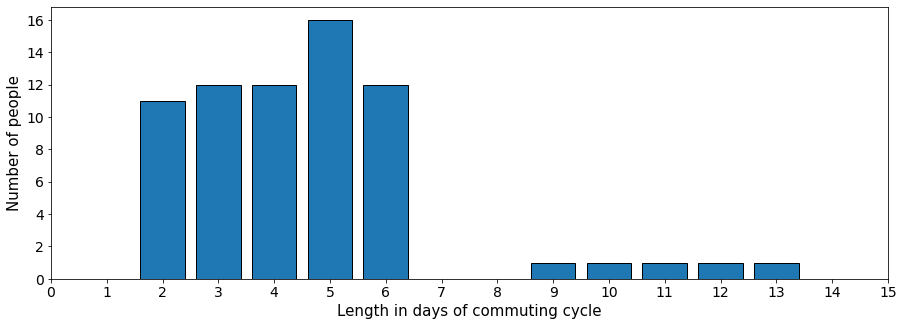

In [8]:
fig, ax = plt.subplots(figsize=(15,5))

fre_x = cycle_len['cycle_leng']
fre_y = cycle_len['OLDVMH']

#bins = bins = int(25)
plt.bar(fre_x,fre_y, alpha=1,  label='dep',edgecolor= 'black')


plt.xticks(np.arange(0,16, 1))
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

#plt.title('distribution of cycle length in days of supra-daily commuters',fontsize=15)
plt.xlabel('Length in days of commuting cycle',fontsize=15)
plt.ylabel('Number of people',fontsize=15)

In [9]:
df = supra_daily.groupby(["IDENT_IND"]).count()
df 

,OLDDEH,OLDADURH,MDESHARR,OLDVMH,cycle_leng
IDENT_IND,,,,,
110000045400002,11,11,11,11,11
110000184700001,5,5,5,5,5
110000266500001,5,5,5,5,5
110000361700001,9,9,9,9,9
110001162400001,8,8,8,8,8
...,...,...,...,...,...
910000595400001,3,3,3,3,3
930000646400001,8,8,8,8,8
930000746500001,6,6,6,6,6


In [10]:
df["month_fre"] = round(df ['OLDDEH']/3)
supra_fr = df.groupby(['month_fre']).count().reset_index()
supra_fr

,month_fre,OLDDEH,OLDADURH,MDESHARR,OLDVMH,cycle_leng
0,1.0,10,10,10,10,10
1,2.0,22,22,22,22,22
2,3.0,13,13,13,13,13
3,4.0,13,13,13,13,13
4,5.0,4,4,4,4,4
5,6.0,1,1,1,1,1
6,7.0,1,1,1,1,1
7,8.0,1,1,1,1,1
8,12.0,2,2,2,2,2
9,15.0,1,1,1,1,1


# frenquency for supra-daily commuters

Text(0, 0.5, 'Number of people')

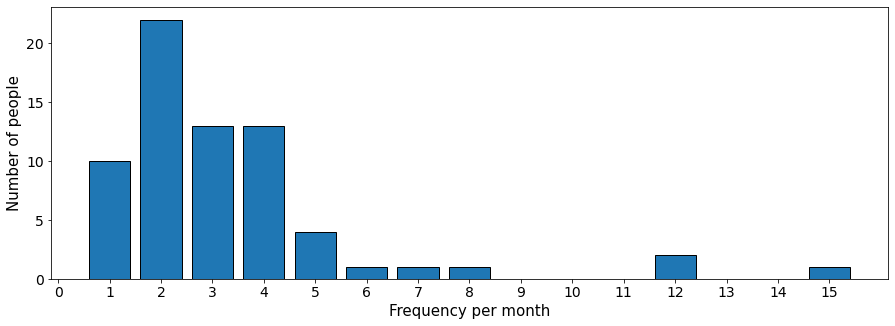

In [11]:
fig, ax = plt.subplots(figsize=(15,5))

fre_x = supra_fr['month_fre']
fre_y = supra_fr['OLDDEH']

#bins = bins = int(25)
plt.bar(fre_x,fre_y, alpha=1,  label='dep',edgecolor= 'black')


plt.xticks(np.arange(0,16, 1))
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

#plt.title('distribution of frequency of supra-daily commuters',fontsize=15)
plt.xlabel('Frequency per month',fontsize=15)
plt.ylabel('Number of people',fontsize=15)

In [12]:
supra_daily_ret = duree_dist_long[(duree_dist_long["OLDVMH"]!=0)&(duree_dist_long['OLDMOT']==1.1)]
supra_daily_ret

,IDENT_IND,poids_annuel,OLDDEBJ_jour,OLDFINJ_jour,OLDVMH,DEP_REG_TRAV_ETUDE,dvo_orides,OLDKM_fin,OLDDEH,OLDADURH,REG_voy_des,REG_dep_ori,OLDTYPDE,NBJOURS_DEP,NUITEE_DEST_DEP,OLDMOT,mtp,MDESHARR
1,110000045400002,21180.036794,vendredi,mercredi,5,1,153.179,250.000000,1900-01-01 10:00:00,150.0,Normandie,Normandie,3,0.0,NaN,1.1,3.2,1900-01-01 12:30:00
3,110000045400002,21180.036794,vendredi,mercredi,5,1,153.179,250.000000,1900-01-01 10:00:00,150.0,Normandie,Normandie,3,0.0,NaN,1.1,3.2,1900-01-01 12:30:00
5,110000045400002,21180.036794,jeudi,mardi,5,1,153.179,250.000000,1900-01-01 10:00:00,150.0,Normandie,Normandie,3,0.0,NaN,1.1,3.2,1900-01-01 12:30:00
7,110000045400002,21180.036794,vendredi,mercredi,5,1,153.179,250.000000,1900-01-01 10:00:00,150.0,Normandie,Normandie,3,0.0,NaN,1.1,3.2,1900-01-01 12:30:00
9,110000045400002,21180.036794,vendredi,mercredi,5,1,153.179,250.000000,1900-01-01 10:00:00,150.0,Normandie,Normandie,3,0.0,NaN,1.1,3.2,1900-01-01 12:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,930001075400001,29686.311392,mardi,mercredi,1,1,201.258,263.439385,1900-01-01 10:36:00,70.0,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes,3,0.0,NaN,1.1,6.1,1900-01-01 11:46:00
4807,930001075400001,29686.311392,mercredi,jeudi,1,1,201.258,263.439385,1900-01-01 10:36:00,70.0,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes,3,0.0,NaN,1.1,6.1,1900-01-01 11:46:00
4809,930001075400001,29686.311392,jeudi,vendredi,1,1,201.258,263.439385,1900-01-01 10:36:00,70.0,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes,3,0.0,NaN,1.1,6.1,1900-01-01 11:46:00
4811,930001075400001,29686.311392,lundi,mardi,1,1,201.258,263.439385,1900-01-01 10:36:00,70.0,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes,3,0.0,NaN,1.1,6.1,1900-01-01 11:46:00


In [13]:
supra_daily_ret = supra_daily_ret[["IDENT_IND","OLDDEH","OLDADURH","MDESHARR","OLDVMH"]].reset_index(drop=True)
supra_daily_ret = supra_daily_ret.sort_values(by='OLDDEH',ascending=True).drop_duplicates().reset_index(drop=True)
supra_daily_ret

,IDENT_IND,OLDDEH,OLDADURH,MDESHARR,OLDVMH
0,540000044100001,1900-01-01 05:30:00,270.0,1900-01-01 10:00:00,8
1,410000083500001,1900-01-01 05:30:00,210.0,1900-01-01 09:00:00,5
2,410000145200002,1900-01-01 06:05:00,120.0,1900-01-01 08:05:00,1
3,240000285200001,1900-01-01 06:45:00,90.0,1900-01-01 08:15:00,4
4,430000031500001,1900-01-01 06:45:00,140.0,1900-01-01 09:05:00,3
...,...,...,...,...,...
63,210000121500001,1900-01-01 19:00:00,130.0,1900-01-01 21:10:00,3
64,420000283400002,1900-01-01 19:00:00,60.0,1900-01-01 20:00:00,4
65,930000746500001,1900-01-01 19:00:00,90.0,1900-01-01 20:30:00,2
66,110001162400001,1900-01-01 20:33:00,180.0,1900-01-01 23:33:00,4


In [14]:
zero = datetime.strptime("1900-01-01 00:00:00", '%Y-%m-%d %H:%M:%S')
one = datetime.strptime("1900-01-01 01:00:00", '%Y-%m-%d %H:%M:%S')
two = datetime.strptime("1900-01-01 02:00:00", '%Y-%m-%d %H:%M:%S')
three = datetime.strptime("1900-01-01 03:00:00", '%Y-%m-%d %H:%M:%S')
four = datetime.strptime("1900-01-01 04:00:00", '%Y-%m-%d %H:%M:%S')
five = datetime.strptime("1900-01-01 05:00:00", '%Y-%m-%d %H:%M:%S')
six = datetime.strptime("1900-01-01 06:00:00", '%Y-%m-%d %H:%M:%S')
seven = datetime.strptime("1900-01-01 07:00:00", '%Y-%m-%d %H:%M:%S')
eight = datetime.strptime("1900-01-01 08:00:00", '%Y-%m-%d %H:%M:%S')
nine = datetime.strptime("1900-01-01 09:00:00", '%Y-%m-%d %H:%M:%S')
ten = datetime.strptime("1900-01-01 10:00:00", '%Y-%m-%d %H:%M:%S')
eleven = datetime.strptime("1900-01-01 11:00:00", '%Y-%m-%d %H:%M:%S')
twelve = datetime.strptime("1900-01-01 12:00:00", '%Y-%m-%d %H:%M:%S')
thirteen = datetime.strptime("1900-01-01 13:00:00", '%Y-%m-%d %H:%M:%S')
fourteen  = datetime.strptime("1900-01-01 14:00:00", '%Y-%m-%d %H:%M:%S')
fifteen = datetime.strptime("1900-01-01 15:00:00", '%Y-%m-%d %H:%M:%S')
sixteen = datetime.strptime("1900-01-01 16:00:00", '%Y-%m-%d %H:%M:%S')
seventeen = datetime.strptime("1900-01-01 17:00:00", '%Y-%m-%d %H:%M:%S')
eighteen = datetime.strptime("1900-01-01 18:00:00", '%Y-%m-%d %H:%M:%S')
nineteen = datetime.strptime("1900-01-01 19:00:00", '%Y-%m-%d %H:%M:%S')
twenty = datetime.strptime("1900-01-01 20:00:00", '%Y-%m-%d %H:%M:%S')
twentyone = datetime.strptime("1900-01-01 21:00:00", '%Y-%m-%d %H:%M:%S')
twentytwo = datetime.strptime("1900-01-01 22:00:00", '%Y-%m-%d %H:%M:%S')
twentythree = datetime.strptime("1900-01-01 23:00:00", '%Y-%m-%d %H:%M:%S')
twentyfour = datetime.strptime("1900-01-01 23:59:59", '%Y-%m-%d %H:%M:%S')

hour_list = [zero, one, two, three, four, five, six, seven, eight, nine, ten, eleven ,twelve, thirteen, fourteen, fifteen,
            sixteen, seventeen, eighteen, nineteen, twenty, twentyone, twentytwo, twentythree,twentyfour ]

In [15]:
hour_count = pd.DataFrame({'nb of people arriving': pd.Series(dtype='int'),
                          'nb of nights': pd.Series(dtype='int')},index=range(25))
hour_count = hour_count.fillna(0)

In [16]:
supra_daily = supra_daily.drop_duplicates().reset_index()

In [17]:
for i in range(len(supra_daily)):
    
    for index, row in hour_count.iterrows():
        #print(index)
        if index == 24:
                break
        elif (supra_daily['MDESHARR'].loc[i]<hour_list[index+1])&(supra_daily['MDESHARR'].loc[i] >= hour_list[index]):
            hour_count['nb of people arriving'].loc[index]+=1
            
            hour_count['nb of nights'].loc[index]=  hour_count['nb of nights'].loc[index] + supra_daily['OLDVMH'].loc[i]+1
            

In [18]:
hour_count['nb of people arriving'].sum()

66.0

In [19]:
hour_count['mean_nights'] = hour_count['nb of nights']/ hour_count['nb of people arriving']
hour_count = hour_count.fillna(0)
hour_count

,nb of people arriving,nb of nights,mean_nights
0,0.0,0.0,0.000000
1,0.0,0.0,0.000000
2,0.0,0.0,0.000000
3,0.0,0.0,0.000000
4,1.0,5.0,5.000000
5,1.0,3.0,3.000000
6,3.0,8.0,2.666667
7,7.0,31.0,4.428571
8,6.0,26.0,4.333333
9,11.0,50.0,4.545455


In [20]:
hour_count_ret = pd.DataFrame({'nb of people leaving': pd.Series(dtype='int'),
                          'nb of nights': pd.Series(dtype='int')},index=range(25))
hour_count_ret = hour_count_ret.fillna(0)

In [21]:
for i in range(len(supra_daily_ret)):
    
    for index, row in hour_count.iterrows():
        #print(index)
        if index == 24:
                break
        elif (supra_daily_ret['MDESHARR'].loc[i]<hour_list[index+1])&(supra_daily_ret['MDESHARR'].loc[i] >= hour_list[index]):
            hour_count_ret['nb of people leaving'].loc[index]+=1
            
            hour_count_ret['nb of nights'].loc[index]=  hour_count_ret['nb of nights'].loc[index] + supra_daily_ret['OLDVMH'].loc[i]+1

In [22]:
hour_count_ret['nb of people leaving'].sum()

67.0

In [23]:
hour_count_ret['mean_nights'] = hour_count_ret['nb of nights']/ hour_count_ret['nb of people leaving']
hour_count_ret = hour_count_ret.fillna(0)
hour_count_ret

,nb of people leaving,nb of nights,mean_nights
0,0.0,0.0,0.000000
1,0.0,0.0,0.000000
2,0.0,0.0,0.000000
3,0.0,0.0,0.000000
4,0.0,0.0,0.000000
5,0.0,0.0,0.000000
6,0.0,0.0,0.000000
7,0.0,0.0,0.000000
8,2.0,7.0,3.500000
9,2.0,10.0,5.000000


In [24]:
hour_count_ret.to_csv("C:/Users/kangl/Desktop/return.csv")
hour_count.to_csv("C:/Users/kangl/Desktop/arrival.csv")

# count of days

In [25]:
duree_dist_long2 = duree_dist_long[duree_dist_long['OLDVMH']!=0]
duree_dist_long2

,IDENT_IND,poids_annuel,OLDDEBJ_jour,OLDFINJ_jour,OLDVMH,DEP_REG_TRAV_ETUDE,dvo_orides,OLDKM_fin,OLDDEH,OLDADURH,REG_voy_des,REG_dep_ori,OLDTYPDE,NBJOURS_DEP,NUITEE_DEST_DEP,OLDMOT,mtp,MDESHARR
0,110000045400002,21180.036794,vendredi,mercredi,5,1,153.179,250.000000,1900-01-01 05:00:00,150.0,Normandie,Ile-de-France,1,0.0,5.0,9.1,3.2,1900-01-01 07:30:00
1,110000045400002,21180.036794,vendredi,mercredi,5,1,153.179,250.000000,1900-01-01 10:00:00,150.0,Normandie,Normandie,3,0.0,NaN,1.1,3.2,1900-01-01 12:30:00
2,110000045400002,21180.036794,vendredi,mercredi,5,1,153.179,250.000000,1900-01-01 05:00:00,150.0,Normandie,Ile-de-France,1,0.0,5.0,9.1,3.2,1900-01-01 07:30:00
3,110000045400002,21180.036794,vendredi,mercredi,5,1,153.179,250.000000,1900-01-01 10:00:00,150.0,Normandie,Normandie,3,0.0,NaN,1.1,3.2,1900-01-01 12:30:00
4,110000045400002,21180.036794,jeudi,mardi,5,1,153.179,250.000000,1900-01-01 05:00:00,150.0,Normandie,Ile-de-France,1,0.0,5.0,9.1,3.2,1900-01-01 07:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809,930001075400001,29686.311392,jeudi,vendredi,1,1,201.258,263.439385,1900-01-01 10:36:00,70.0,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes,3,0.0,NaN,1.1,6.1,1900-01-01 11:46:00
4810,930001075400001,29686.311392,lundi,mardi,1,1,201.258,263.439385,1900-01-01 06:40:00,70.0,Auvergne-Rhône-Alpes,Provence-Alpes-Côte dAzur,1,0.0,1.0,9.1,6.1,1900-01-01 07:50:00
4811,930001075400001,29686.311392,lundi,mardi,1,1,201.258,263.439385,1900-01-01 10:36:00,70.0,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes,3,0.0,NaN,1.1,6.1,1900-01-01 11:46:00
4812,930001075400001,29686.311392,mardi,mercredi,1,1,201.258,263.439385,1900-01-01 06:40:00,70.0,Auvergne-Rhône-Alpes,Provence-Alpes-Côte dAzur,1,0.0,1.0,9.1,6.1,1900-01-01 07:50:00


In [26]:
outboundday = duree_dist_long2[(duree_dist_long2['OLDMOT']==9.1)].reset_index(drop=True)
outboundday_withwork = outboundday[outboundday['MDESHARR']<seventeen].reset_index(drop=True)
outboundday_withoutwork = outboundday[outboundday['MDESHARR']>=seventeen].reset_index(drop=True)
len(outboundday_withoutwork)

167

In [27]:
len(outboundday_withwork)

492

In [28]:
returnday = duree_dist_long2[(duree_dist_long2['OLDMOT']==1.1)].reset_index(drop=True)
returnday_withwork = returnday [returnday ['MDESHARR']>=seventeen].reset_index(drop=True)
returnday_withoutwork = returnday [returnday ['MDESHARR']<seventeen].reset_index(drop=True)
len(returnday_withoutwork)

320

In [29]:
len(returnday_withwork)

332

# 2.2.1 Frequency of daily and bi-daily commuters

In [30]:
individu = individu[["IDENT_IND","pond_indC","BTRAVNBJ"]]

In [31]:
trips_IDF_pro_dom = local_trips[(local_trips['MMOTIFDES'] == 9.1)&(local_trips['MOTPREC'] == 1.1)].reset_index(drop=True)
duree_dist = trips_IDF_pro_dom [ ['mtp','MDATE_jour','MDATE_mois','IDENT_MEN','IDENT_IND','POND_JOUR','REG_ORI','REG_DES',
                                  'DUREE','dVO_ORIDES','MDISTTOT_fin','MORIDOM','MMOTIFDES','MORIHDEP','MDESHARR','DURACT','MOTPREC','MORI1MOTIF']]
duree_dist = duree_dist.dropna().reset_index(drop=True)
duree_dist

,mtp,MDATE_jour,MDATE_mois,IDENT_MEN,IDENT_IND,POND_JOUR,REG_ORI,REG_DES,DUREE,dVO_ORIDES,MDISTTOT_fin,MORIDOM,MMOTIFDES,MORIHDEP,MDESHARR,DURACT,MOTPREC,MORI1MOTIF
0,3.1,mercredi,septembre,1100000135000,110000013500002,24058.724023,Ile-de-France,Ile-de-France,15.0,4.702,5.321410,1,9.1,15:00:00,15:15:00,510.0,1.1,1.1
1,3.1,mardi,octobre,1100000136000,110000013600001,20658.322154,Ile-de-France,Ile-de-France,60.0,21.216,25.232499,1,9.1,7:15:00,8:15:00,585.0,1.1,1.1
2,3.1,mardi,décembre,1100000146000,110000014600002,72577.568321,Ile-de-France,Ile-de-France,45.0,18.484,25.000000,1,9.1,6:30:00,7:15:00,615.0,1.1,1.1
3,5.8,vendredi,novembre,1100000147000,110000014700001,22824.505077,Ile-de-France,Ile-de-France,45.0,13.372,17.000000,1,9.1,9:30:00,10:15:00,585.0,1.1,1.1
4,5.8,samedi,février,1100000153000,110000015300001,46915.340040,Ile-de-France,Ile-de-France,90.0,23.929,32.584874,1,9.1,8:00:00,9:30:00,630.0,1.1,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,3.1,lundi,février,9400000252000,940000025200001,26483.792023,Corse,Corse,40.0,22.671,35.000000,1,9.1,5:15:00,5:55:00,485.0,1.1,1.1
3076,3.1,mercredi,mai,9400000314000,940000031400001,45033.123678,Corse,Corse,15.0,5.326,6.000000,1,9.1,9:00:00,9:15:00,615.0,1.1,1.1
3077,3.1,vendredi,septembre,9400000331000,940000033100001,22347.872637,Corse,Corse,15.0,7.112,10.000000,1,9.1,7:30:00,7:45:00,135.0,1.1,1.1
3078,3.1,samedi,avril,9400000364000,940000036400001,42481.676290,Corse,Corse,30.0,28.836,35.000000,1,9.1,5:15:00,5:45:00,825.0,1.1,1.1


In [32]:
duree_dist['MORIHDEP'] = pd.to_datetime(duree_dist['MORIHDEP'], format='%H:%M:%S')
duree_dist['MDESHARR'] = pd.to_datetime(duree_dist['MDESHARR'], format='%H:%M:%S')

In [33]:
v = duree_dist.IDENT_IND.value_counts()

# daily

In [34]:
#get the individuals which appeared more than once
mono_quo = duree_dist[duree_dist.IDENT_IND.isin(v.index[v.eq(1)])].reset_index(drop=True)
mono_quo.head()

,mtp,MDATE_jour,MDATE_mois,IDENT_MEN,IDENT_IND,POND_JOUR,REG_ORI,REG_DES,DUREE,dVO_ORIDES,MDISTTOT_fin,MORIDOM,MMOTIFDES,MORIHDEP,MDESHARR,DURACT,MOTPREC,MORI1MOTIF
0,3.1,mercredi,septembre,1100000135000,110000013500002,24058.724023,Ile-de-France,Ile-de-France,15.0,4.702,5.321410,1,9.1,1900-01-01 15:00:00,1900-01-01 15:15:00,510.0,1.1,1.1
1,3.1,mardi,octobre,1100000136000,110000013600001,20658.322154,Ile-de-France,Ile-de-France,60.0,21.216,25.232499,1,9.1,1900-01-01 07:15:00,1900-01-01 08:15:00,585.0,1.1,1.1
2,3.1,mardi,décembre,1100000146000,110000014600002,72577.568321,Ile-de-France,Ile-de-France,45.0,18.484,25.000000,1,9.1,1900-01-01 06:30:00,1900-01-01 07:15:00,615.0,1.1,1.1
3,5.8,vendredi,novembre,1100000147000,110000014700001,22824.505077,Ile-de-France,Ile-de-France,45.0,13.372,17.000000,1,9.1,1900-01-01 09:30:00,1900-01-01 10:15:00,585.0,1.1,1.1
4,5.8,samedi,février,1100000153000,110000015300001,46915.340040,Ile-de-France,Ile-de-France,90.0,23.929,32.584874,1,9.1,1900-01-01 08:00:00,1900-01-01 09:30:00,630.0,1.1,1.1


In [35]:
mono = mono_quo.merge(individu, left_on='IDENT_IND', right_on='IDENT_IND',how = 'left')
mono.BTRAVNBJ.mean()

4.9289592760181

In [36]:
mnogru = mono.groupby(['BTRAVNBJ']).count().reset_index()
mnogru

,BTRAVNBJ,mtp,MDATE_jour,MDATE_mois,IDENT_MEN,IDENT_IND,POND_JOUR,REG_ORI,REG_DES,DUREE,dVO_ORIDES,MDISTTOT_fin,MORIDOM,MMOTIFDES,MORIHDEP,MDESHARR,DURACT,MOTPREC,MORI1MOTIF,pond_indC
0,1.0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
1,2.0,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
2,3.0,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
3,4.0,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252
4,5.0,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661
5,6.0,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182
6,7.0,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43


# bi-daily

In [37]:
#get the individuals which appeared more than once
backhomelunch = duree_dist[duree_dist.IDENT_IND.isin(v.index[v.gt(1)])].reset_index(drop=True)
bidaily = backhomelunch[["IDENT_IND"]].drop_duplicates()
bidaily

,IDENT_IND
0,110000022700001
2,110000054800001
4,110000146400001
6,110000162400006
8,110000222300001
...,...
725,930000883400001
727,930000902500002
729,930000974500002
731,940000012500001


In [38]:
bi= bidaily.merge(individu, left_on='IDENT_IND', right_on='IDENT_IND',how = 'left')
bi.BTRAVNBJ.mean()

5.13782991202346

In [39]:
bigru = bi.groupby(['BTRAVNBJ']).count().reset_index()
bigru

,BTRAVNBJ,IDENT_IND,pond_indC
0,1.0,2,2
1,2.0,1,1
2,3.0,6,6
3,4.0,26,26
4,5.0,238,238
5,6.0,40,40
6,7.0,28,28


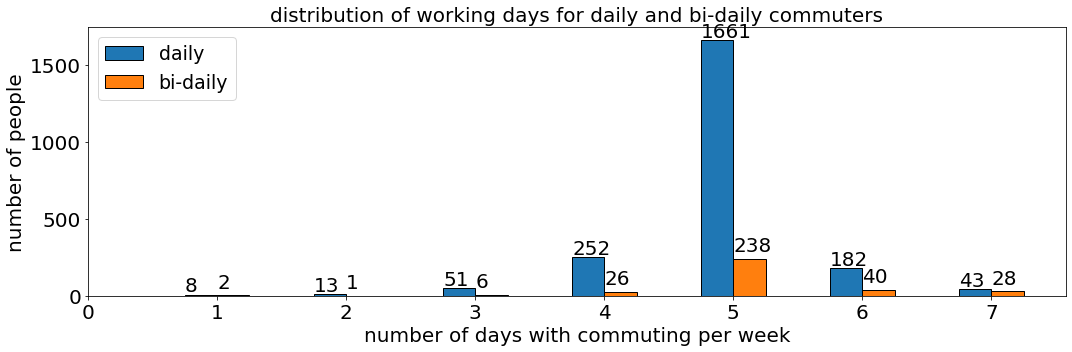

In [40]:
fig, ax = plt.subplots(figsize=(15,5))
width = 0.125

fre_mono = mnogru['BTRAVNBJ']
height_mono = mnogru['mtp']

fre_bi = bigru['BTRAVNBJ']
height_bi = bigru['IDENT_IND']

plt.bar(fre_mono-width, height_mono,0.25,  alpha=1, label='daily',edgecolor= 'black')
plt.bar(fre_bi+width , height_bi, 0.25, alpha=1, label='bi-daily',edgecolor= 'black')

plt.xticks(np.arange(0,8, 1))
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(loc=2, prop={'size': 19});

plt.title('distribution of working days for daily and bi-daily commuters',fontsize=20)
plt.xlabel('number of days with commuting per week',fontsize=20)
plt.ylabel('number of people',fontsize=20)

for index,data in enumerate(height_bi):
    plt.text(x=index+1, y =data +50, s= data, fontdict=dict(fontsize=20))
    
for idx,dataa in enumerate(height_mono):
    plt.text(x=idx+0.75, y =dataa +20, s= dataa, fontdict=dict(fontsize=20))
    
    
plt.tight_layout()
plt.show()

# frequency for long distance daily

In [41]:
LD_daily = duree_dist_long[(duree_dist_long["OLDVMH"]==0)&(duree_dist_long['OLDMOT']==9.1)].reset_index(drop=True)
LD_daily

,IDENT_IND,poids_annuel,OLDDEBJ_jour,OLDFINJ_jour,OLDVMH,DEP_REG_TRAV_ETUDE,dvo_orides,OLDKM_fin,OLDDEH,OLDADURH,REG_voy_des,REG_dep_ori,OLDTYPDE,NBJOURS_DEP,NUITEE_DEST_DEP,OLDMOT,mtp,MDESHARR
0,110001285700001,8032.252502,lundi,lundi,0,1,345.042,439.22614,1900-01-01 07:00:00,180.0,Pays de la Loire,Ile-de-France,2,0.0,0.0,9.1,6.4,1900-01-01 10:00:00
1,110001285700001,8032.252502,jeudi,jeudi,0,1,345.042,439.22614,1900-01-01 07:00:00,180.0,Pays de la Loire,Ile-de-France,2,0.0,0.0,9.1,6.4,1900-01-01 10:00:00
2,110001285700001,8032.252502,lundi,lundi,0,1,345.042,439.22614,1900-01-01 07:00:00,180.0,Pays de la Loire,Ile-de-France,2,0.0,0.0,9.1,6.4,1900-01-01 10:00:00
3,110001285700001,8032.252502,mercredi,mercredi,0,1,345.042,439.22614,1900-01-01 07:00:00,180.0,Pays de la Loire,Ile-de-France,2,0.0,0.0,9.1,6.4,1900-01-01 10:00:00
4,110001285700001,8032.252502,lundi,lundi,0,1,345.042,439.22614,1900-01-01 07:00:00,180.0,Pays de la Loire,Ile-de-France,2,0.0,0.0,9.1,6.4,1900-01-01 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,930000985500001,17775.837387,mercredi,mercredi,0,1,583.326,800.00000,1900-01-01 05:30:00,240.0,Ile-de-France,Provence-Alpes-Côte dAzur,2,0.0,0.0,9.1,6.1,1900-01-01 09:30:00
1744,930000985500001,17775.837387,mercredi,mercredi,0,1,583.326,800.00000,1900-01-01 05:30:00,240.0,Ile-de-France,Provence-Alpes-Côte dAzur,2,0.0,0.0,9.1,6.1,1900-01-01 09:30:00
1745,930001061400002,19584.587063,mercredi,mercredi,0,1,582.102,800.00000,1900-01-01 05:00:00,200.0,Ile-de-France,Provence-Alpes-Côte dAzur,2,0.0,0.0,9.1,6.1,1900-01-01 08:20:00
1746,930001061400002,19584.587063,vendredi,vendredi,0,1,582.102,800.00000,1900-01-01 05:00:00,200.0,Ile-de-France,Provence-Alpes-Côte dAzur,2,0.0,0.0,9.1,6.1,1900-01-01 08:20:00


In [42]:
LD_daily = LD_daily[["IDENT_IND","OLDDEH","OLDADURH","MDESHARR","OLDVMH","dvo_orides"]].reset_index(drop=True)
LD_daily = LD_daily.sort_values(by='MDESHARR',ascending=True).reset_index(drop=True)
LD_daily.head()

,IDENT_IND,OLDDEH,OLDADURH,MDESHARR,OLDVMH,dvo_orides
0,260000123500001,1900-01-01 04:45:00,75.0,1900-01-01 06:00:00,0,74.839
1,260000123500001,1900-01-01 04:45:00,75.0,1900-01-01 06:00:00,0,74.839
2,260000123500001,1900-01-01 04:45:00,75.0,1900-01-01 06:00:00,0,74.839
3,260000123500001,1900-01-01 04:45:00,75.0,1900-01-01 06:00:00,0,74.839
4,260000123500001,1900-01-01 04:45:00,75.0,1900-01-01 06:00:00,0,74.839


In [43]:
LD_df = LD_daily.groupby(['IDENT_IND']).count().reset_index()
LD_df.OLDDEH.mean()/3

9.55191256830601

# frequency of long distance daily commuters

In [44]:
LD_df2 = LD_daily.drop_duplicates().reset_index(drop=True)
LD_df2

,IDENT_IND,OLDDEH,OLDADURH,MDESHARR,OLDVMH,dvo_orides
0,260000123500001,1900-01-01 04:45:00,75.0,1900-01-01 06:00:00,0,74.839
1,410000214200002,1900-01-01 05:35:00,45.0,1900-01-01 06:20:00,0,32.737
2,830000181200001,1900-01-01 06:00:00,60.0,1900-01-01 07:00:00,0,117.623
3,820000944500001,1900-01-01 05:35:00,90.0,1900-01-01 07:05:00,0,57.911
4,930000743400001,1900-01-01 05:30:00,100.0,1900-01-01 07:10:00,0,108.672
...,...,...,...,...,...,...
56,520000363500001,1900-01-01 12:00:00,80.0,1900-01-01 13:20:00,0,89.968
57,230000251500001,1900-01-01 10:00:00,210.0,1900-01-01 13:30:00,0,146.944
58,210000121600001,1900-01-01 11:00:00,240.0,1900-01-01 15:00:00,0,158.104
59,220000083600001,1900-01-01 16:30:00,90.0,1900-01-01 18:00:00,0,45.467


In [45]:
LD_df["month_fre"] = round(LD_df ['OLDDEH']/3)
LD_df3 = LD_df.merge(LD_df2,left_on = "IDENT_IND", right_on = "IDENT_IND", how ='left')
LD_df3

,IDENT_IND,OLDDEH_x,OLDADURH_x,MDESHARR_x,OLDVMH_x,dvo_orides_x,month_fre,OLDDEH_y,OLDADURH_y,MDESHARR_y,OLDVMH_y,dvo_orides_y
0,110001285700001,8,8,8,8,8,3.0,1900-01-01 07:00:00,180.0,1900-01-01 10:00:00,0,345.042
1,210000121600001,9,9,9,9,9,3.0,1900-01-01 11:00:00,240.0,1900-01-01 15:00:00,0,158.104
2,220000036100001,6,6,6,6,6,2.0,1900-01-01 04:30:00,180.0,1900-01-01 07:30:00,0,198.131
3,220000053500002,47,47,47,47,47,16.0,1900-01-01 05:15:00,150.0,1900-01-01 07:45:00,0,102.540
4,220000083600001,7,7,7,7,7,2.0,1900-01-01 16:30:00,90.0,1900-01-01 18:00:00,0,45.467
...,...,...,...,...,...,...,...,...,...,...,...,...
56,930000233500001,32,32,32,32,32,11.0,1900-01-01 07:00:00,105.0,1900-01-01 08:45:00,0,137.196
57,930000472400001,44,44,44,44,44,15.0,1900-01-01 07:00:00,120.0,1900-01-01 09:00:00,0,72.808
58,930000743400001,65,65,65,65,65,22.0,1900-01-01 05:30:00,100.0,1900-01-01 07:10:00,0,108.672
59,930000985500001,10,10,10,10,10,3.0,1900-01-01 05:30:00,240.0,1900-01-01 09:30:00,0,583.326


In [46]:
fr = LD_df3.groupby(['month_fre']).count().reset_index()
fr2 = LD_df3.groupby(['month_fre']).dvo_orides_y.mean().reset_index()
fr2.head()

,month_fre,dvo_orides_y
0,1.0,292.772400
1,2.0,242.450286
2,3.0,209.071364
3,4.0,62.801000
4,5.0,194.976000


In [47]:
fr

,month_fre,IDENT_IND,OLDDEH_x,OLDADURH_x,MDESHARR_x,OLDVMH_x,dvo_orides_x,OLDDEH_y,OLDADURH_y,MDESHARR_y,OLDVMH_y,dvo_orides_y
0,1.0,5,5,5,5,5,5,5,5,5,5,5
1,2.0,7,7,7,7,7,7,7,7,7,7,7
2,3.0,11,11,11,11,11,11,11,11,11,11,11
3,4.0,1,1,1,1,1,1,1,1,1,1,1
4,5.0,3,3,3,3,3,3,3,3,3,3,3
5,6.0,1,1,1,1,1,1,1,1,1,1,1
6,7.0,2,2,2,2,2,2,2,2,2,2,2
7,8.0,2,2,2,2,2,2,2,2,2,2,2
8,9.0,1,1,1,1,1,1,1,1,1,1,1
9,10.0,2,2,2,2,2,2,2,2,2,2,2


Text(0, 0.5, 'Number of people')

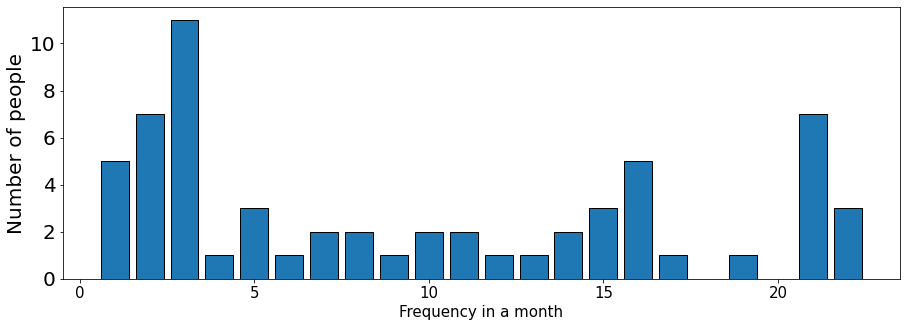

In [57]:
fig, ax = plt.subplots(figsize=(15,5))
fre_x = fr['month_fre']
fre_y = fr['OLDDEH_x']
#ax.bar(fre_x-0.125, fre_y, 0.25, alpha=1, label='Monthly frequency',edgecolor= 'black')

plt.bar(fre_x,fre_y, alpha=1,  label='dep',edgecolor= 'black')
#plt.title('distribution of frequency of long distance daily commuters',fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Frequency in a month',fontsize=15)
ax.set_ylabel('Number of people',fontsize=20)

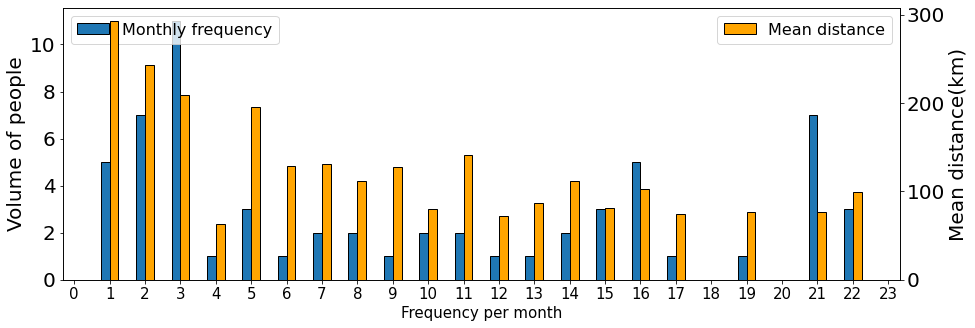

In [48]:
fig, ax = plt.subplots(figsize=(15,5))
ax2=ax.twinx()

fre_x = fr['month_fre']
fre_y = fr['OLDDEH_x']

fre_x2 = fr2['month_fre']
fre_y2 = fr2['dvo_orides_y']

#bins = bins = int(25)
ax.bar(fre_x-0.125, fre_y, 0.25, alpha=1, label='Monthly frequency',edgecolor= 'black')
ax2.bar(fre_x2+0.125, fre_y2, 0.25,alpha=1,  label='Mean distance', color = 'orange',edgecolor= 'black')


plt.xticks(np.arange(0,24, 1))

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

#plt.title('distribution of frequency of long distance daily commuters',fontsize=15)
ax.set_xlabel('Frequency per month',fontsize=15)
ax.set_ylabel('Volume of people',fontsize=20)
ax2.set_ylabel('Mean distance(km)',fontsize=20)

ax.legend(loc=2, prop={'size': 16});
ax2.legend(loc=1, prop={'size': 16});

# frequency for long distance: supra-daily and long distance daily

In [49]:
#duree_dist_long.to_csv("C:/Users/kangl/Desktop/données/emploi/notes/les-attractions-de-l'emploi-francilien/MOBPRO_ENTD/excel_files/chpitre2/4814trips.csv")

In [50]:
ddl = duree_dist_long [["IDENT_IND","poids_annuel"]]
df = ddl.groupby(["IDENT_IND"]).count().reset_index()
df = df[["IDENT_IND","poids_annuel"]]
df.sort_values(by='poids_annuel',ascending=True)

,IDENT_IND,poids_annuel
67,410000311400001,4
116,910000066400001,4
28,230000255500001,4
18,220000162500002,4
17,220000104100001,4
...,...,...
25,230000166400001,128
100,730000033100001,128
123,930000743400001,130
52,260000225500002,130


In [51]:
df

,IDENT_IND,poids_annuel
0,110000045400002,22
1,110000184700001,10
2,110000266500001,10
3,110000361700001,18
4,110001162400001,16
...,...,...
124,930000746500001,12
125,930000985500001,20
126,930001016500001,24
127,930001061400002,6


Text(0, 0.5, 'number of people')

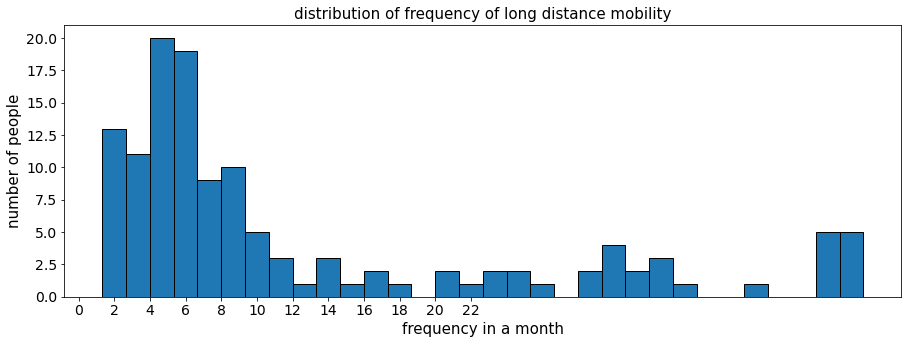

In [52]:
fig, ax = plt.subplots(figsize=(15,5))
fre = df ['poids_annuel']/3

bins = bins = int(32)
plt.hist(fre,bins, alpha=1,  label='dep',edgecolor= 'black')
plt.xticks(np.arange(0,23, 2))
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.title('distribution of frequency of long distance mobility',fontsize=15)
plt.xlabel('frequency in a month',fontsize=15)
plt.ylabel('number of people',fontsize=15)